In [22]:
%matplotlib ipympl

In [23]:
import sys
sys.path
sys.path.append('/home/peter/PHY487Research/JakeBlackmore-Diatomic-Py-4b2ce31/diatom')
print(sys.path)

['/home/peter/PHY487Research/NaCs_Research', '/home/peter/anaconda3/lib/python311.zip', '/home/peter/anaconda3/lib/python3.11', '/home/peter/anaconda3/lib/python3.11/lib-dynload', '', '/home/peter/anaconda3/lib/python3.11/site-packages', '/home/peter/PHY487Research/JakeBlackmore-Diatomic-Py-4b2ce31/diatom', '/home/peter/PHY487Research/JakeBlackmore-Diatomic-Py-4b2ce31/diatom']


In [24]:
import numpy
import matplotlib.pyplot as pyplot
import hamiltonian as hamiltonian
from constants import Rb87Cs133
from scipy.constants import h
from numpy.linalg import eigh

In [25]:
Nmax=4
H0,Hz,Hdc,Hac = \
    hamiltonian.build_hamiltonians(Nmax,Rb87Cs133,zeeman=True,Edc=True,ac=True)

I = 0 #W/m^2
E = numpy.linspace(0, 5, int(60))*1e5 #V/m
B = 0 #T

H = H0[..., None]+\
    Hz[..., None]*B+\
    Hdc[..., None]*E+\
    Hac[..., None]*I 
H = H.transpose(2,0,1)

energies, states = eigh(H)

/home/peter/PHY487Research/JakeBlackmore-Diatomic-Py-4b2ce31/diatom/hamiltonian.py:618: RuntimeWarning: invalid value encountered in multiply
  HAC[i,j]= -a2*(wigner_D(2,M,0,Beta,0)*(-1)**M2*\


Text(0.5, 0, 'Electric Field (kV/cm)')

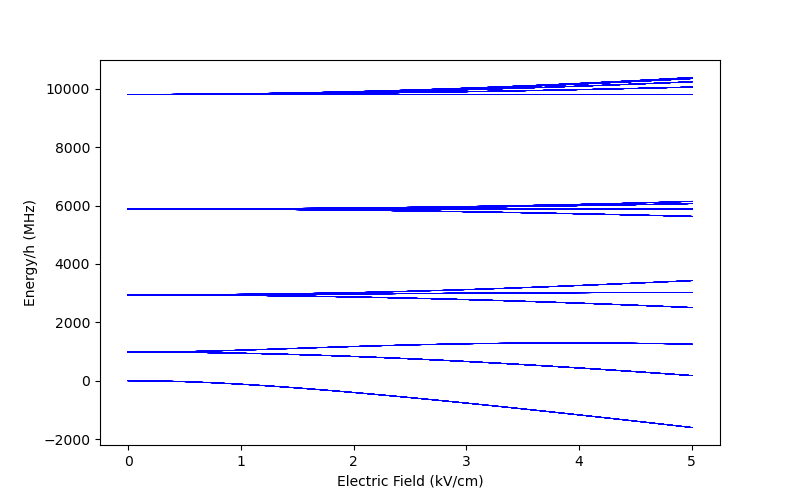

In [35]:
fig, ax = pyplot.subplots(figsize=(8, 5))

ax.plot(E*1e-5, energies*1e-6/h, color='b', linewidth=0.5)
#ax.set_ylim(-4000, 10000)
#ax.set_xlim(0, 5)
ax.set_ylabel("Energy/h (MHz)")
ax.set_xlabel("Electric Field (kV/cm)")

In [27]:
print(len(energies[0]))
print(len(energies))

800
60


In [28]:
energies.shape

(60, 800)